- While the idea of happiness is mostly subjectively tailored to each individual, society or community, there are but certain metrics that are used to determine the overall happiness of a demographic.
- This notebook seeks to analyze and maybe determine which of these metrics are more important in determining the happiness to a given country and the globe as a whole and look into how tweeking a certain data point would have an effect on the general happiness level. 
- This could be useful leaders, politicians or lobbyists everywhere to determine which aspects of life would make their citizens the more happier and use the data to build their platforms.
- The dataset used here comes from https://www.kaggle.com/mathurinache/world-happiness-report and contains over 20 columns of data each being a metric derived from a certain country.

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17, 7
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.2)
import graphviz
import plotly.express as px
import plotly.graph_objects as go
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2020.csv to 2020.csv


# Data


This is where the dataset contains over 20 columns each being a metric derived from a certain country.

- The ladder score, Whiskers and the Dystopia + Residual are basically, just different targets.
- Dystopia Residual compares each countries scores to the theoretical unhappiest country in the world. 
- Here I will mostly focus on ladder score which is the happiness score as my target

In [ ]:
happiness_2020 = pd.read_csv('2020.csv')
print(happiness_2020.shape)
happiness_2020.head(2)

(153, 20)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741


In [ ]:
happiness_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

-The data has no missing values.




In [ ]:
happiness_2020.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.336643e-15,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


# Exploratory Data Analysis

Plotting the top 20 and bottom 20 happiest countries considering the ladder score

In [ ]:
top_20 = happiness_2020.nlargest(20, 'Ladder score')
figure = px.bar(top_20, x='Ladder score', y='Country name', color='Country name', text='Ladder score', orientation='h',
             title='Top 20 Happiest Countries as of 2020', color_discrete_sequence=px.colors.qualitative.Antique, template='plotly_dark')
figure.show()

In [ ]:
bottom_20 = happiness_2020.nsmallest(20, 'Ladder score')
figure = px.bar(bottom_20, x='Ladder score', y='Country name', color='Country name', text='Ladder score', orientation='h',
             title='20 Least Happiest Countries as of 2020', color_discrete_sequence=px.colors.qualitative.Antique, template='plotly_dark')
figure.show()

Plotting countries topping each of the metrics

In [ ]:
top_10_GDP = happiness_2020.sort_values('Logged GDP per capita').nlargest(10, 'Logged GDP per capita')
figure = px.bar(top_10_GDP, x='Logged GDP per capita', y='Country name', color='Country name', text='Logged GDP per capita', orientation='h',
             title='Top 10 Countries with the Highest GDP per Capita as of 2020', color_discrete_sequence=px.colors.qualitative.Antique, template='plotly_dark')
figure.show()

In [ ]:
top_10_supportive = happiness_2020.sort_values('Social support').nlargest(10, 'Social support')
figure = px.bar(top_10_supportive, x='Social support', y='Country name', color='Country name', text='Social support', orientation='h',
             title='Top 10 Countries with the Highest Social support as of 2020', color_discrete_sequence=px.colors.qualitative.Antique, template='plotly_dark')
figure.show()

In [ ]:
top_10_healthy = happiness_2020.sort_values('Healthy life expectancy').nlargest(10, 'Healthy life expectancy')
figure = px.bar(top_10_healthy, x='Healthy life expectancy', y='Country name', color='Country name', text='Healthy life expectancy', orientation='h',
             title='Top 10 Countries with the Healthiest Life Expectancy as of 2020', color_discrete_sequence=px.colors.qualitative.Antique, template='plotly_dark')
figure.show()

In [ ]:
top_10_free= happiness_2020.sort_values('Freedom to make life choices').nlargest(10, 'Freedom to make life choices')
figure = px.bar(top_10_free, x='Freedom to make life choices', y='Country name', color='Country name', text='Freedom to make life choices', orientation='h',
             title='Top 10 Countries with the most Freedom to Make Life Choices as of 2020', color_discrete_sequence=px.colors.qualitative.Antique, template='plotly_dark')
figure.show()

In [ ]:
top_10_generous = happiness_2020.sort_values('Generosity').nlargest(10, 'Generosity')
figure = px.bar(top_10_generous, x='Generosity', y='Country name', color='Country name', text='Generosity', orientation='h',
             title='Top 10 Most Generous Countries as of 2020', color_discrete_sequence=px.colors.qualitative.Antique, template='plotly_dark')
figure.show()

In [ ]:
top_10_least_corrupt = happiness_2020.sort_values('Perceptions of corruption').nsmallest(10, 'Perceptions of corruption')
figure = px.bar(top_10_least_corrupt, x='Perceptions of corruption', y='Country name', color='Country name', text='Perceptions of corruption', orientation='h',
             title='Top 10 Least Corrupt Governments as of 2020', color_discrete_sequence=px.colors.qualitative.Antique, template='plotly_dark')
figure.show()

In [ ]:
happiness_2020.head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741


In [ ]:
figure = px.choropleth(happiness_2020, locations='Country name', locationmode='country names', color='Ladder score', range_color=[0, 7],
                       color_continuous_scale='blues', title="Distribution of Happiness across the Globe",
                       template='plotly_dark', hover_data=['Logged GDP per capita', 'Social support', 'Healthy life expectancy',	
                                                           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                                                           'Country name'])

figure.show()

# Correlation between Features

Plotting the correlation between the different metrics used to evaluate Happiness

In [ ]:
happiness_2020_ = happiness_2020.iloc[:, :12].drop(columns=['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Regional indicator']).set_index('Country name')

In [ ]:
spearman_corr_matrix = happiness_2020_.corr(method='spearman')
spearman_corr_matrix

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.791543,0.803114,0.783036,0.591958,0.074511,-0.277452
Logged GDP per capita,0.791543,1.000000,0.778471,0.851286,0.422249,-0.071404,-0.255891
Social support,0.803114,0.778471,1.000000,0.729803,0.489911,0.003910,-0.142887
Healthy life expectancy,0.783036,0.851286,0.729803,1.000000,0.445348,-0.039891,-0.225299
Freedom to make life choices,0.591958,0.422249,0.489911,0.445348,1.000000,0.295394,-0.370847
Generosity,0.074511,-0.071404,0.003910,-0.039891,0.295394,1.000000,-0.245919
Perceptions of corruption,-0.277452,-0.255891,-0.142887,-0.225299,-0.370847,-0.245919,1.000000


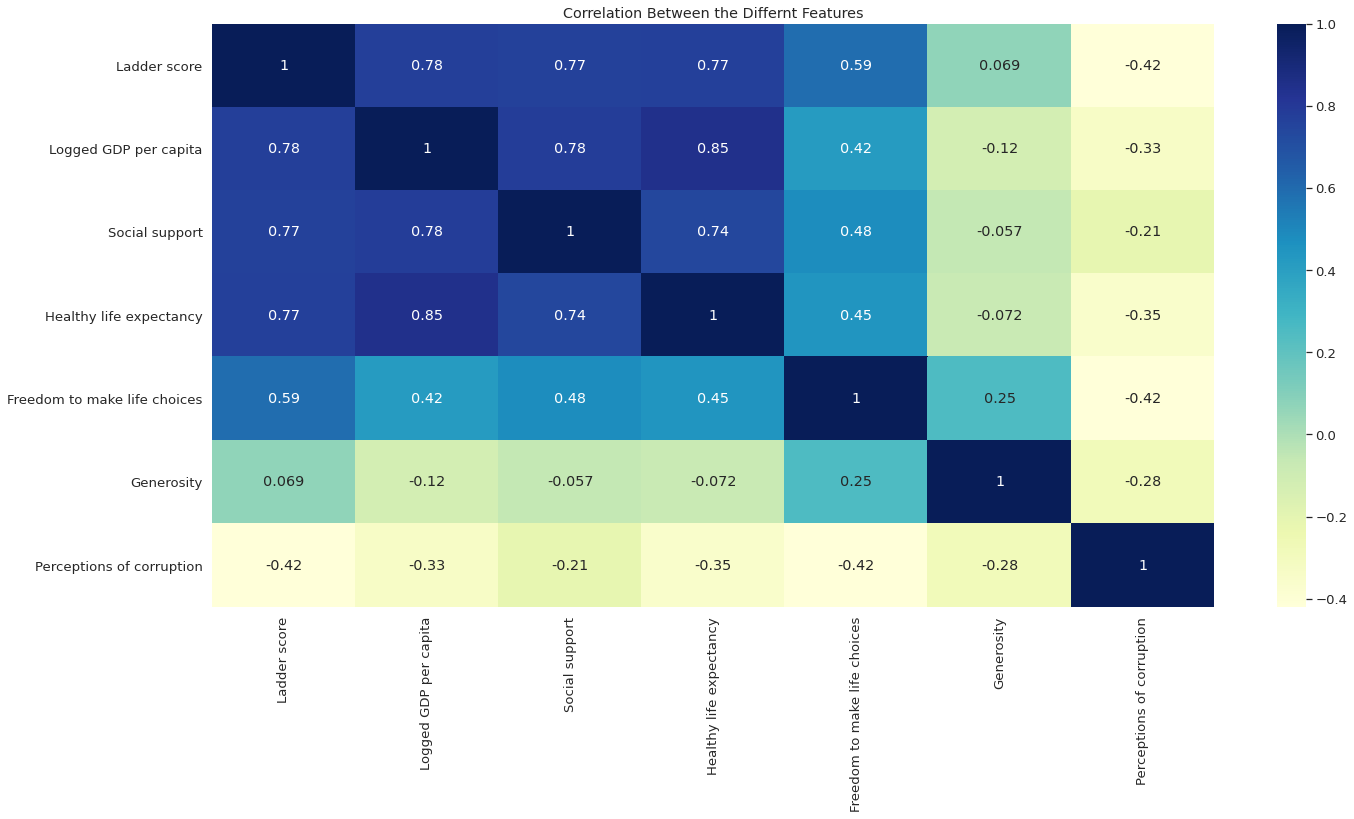

In [ ]:
pearson_corr_matrix = happiness_2020_.corr()

rcParams['figure.figsize'] = 20, 10

plt.title('Correlation Between the Differnt Features')
sns.heatmap(pearson_corr_matrix, annot=True, cmap='YlGnBu')

- Generally, 'GDP', 'Social Support', and 'Healthy life expectancy' seem to  have a strong positive correlation with the ladder score i.e happiness score.
- 'Freedom to make own choices' correlates quite okay with the ladder score. 
- Perceptions of corruption has a rather mediocre negative correlation with the ladder score.
- While 'Generocity' doesn't seem to have any particular correlation

In [ ]:
#sns.pairplot(happiness_2020_, hue='Ladder score')
#hvplot.scatter_matrix(df.drop(['target_n'], axis=1), c='target')
#plt.show()

Beyond Simple Correlation:

- Here, I attempt to discover 1D relationships between all columns in my dataframe using the discover_feature_correlations module now name beyond_correlation module.
- The goal is to try and better understand the data by learning which features (1 column at a time) predict each other column. 
- This code attempts to learn a predictive relationship between the Cartesian product (all pairs) of all columns rather than just learning which co,umns predict relationships with the target column



In [ ]:
%pip install discover_feature_relationships

In [ ]:
from discover_feature_relationships import discover

classifier_overrides = set()
disc = discover.discover(happiness_2020_, classifier_overrides)

In [ ]:
disc.pivot(index='target', columns='feature', values='score').fillna(1).style.background_gradient(cmap="Reds", low=0.3, high=0.0, axis=1).set_precision(2)

feature,Freedom to make life choices,Generosity,Healthy life expectancy,Ladder score,Logged GDP per capita,Perceptions of corruption,Social support
target,,,,,,,
Freedom to make life choices,1.00,-1.87,-1.77,-0.19,-1.25,-1.87,-1.16
Generosity,-0.59,1.00,-0.72,-0.13,-0.40,-0.56,-0.24
Healthy life expectancy,-2.41,-3.94,1.00,-1.53,-0.10,-3.87,-0.86
Ladder score,-8.74,-10.47,-5.08,1.00,-5.12,-11.95,-5.71
Logged GDP per capita,-3.25,-3.11,-0.05,-1.42,1.00,-4.11,-0.57
Perceptions of corruption,-1.05,-1.28,-0.70,-0.55,-0.01,1.00,-1.00
Social support,-3.11,-4.98,-0.93,-0.47,-0.95,-8.85,1.00


Earlier we noticed that the countries' rank differently with each metric.
- Here, I attempt to uncover each country's rank on each of the metrics and on the overall happiness score.
- And I'll also show which of these specific metrics dominantly influences the happiness of each country's population

In [ ]:
rank_df = happiness_2020_.iloc[:, :].rank(axis=0, numeric_only=True, method='dense', ascending=False)
rank_df['Influence'] = happiness_2020_.iloc[:, 1:].rank(axis=0, numeric_only=True, method='dense').idxmax(axis=1)
rank_df['True_Influence'] = happiness_2020_.iloc[:, 1:4].rank(axis=0, numeric_only=True, method='dense').idxmax(axis=1)
# rank_df['Country_Codes'] = rank_df['Country_Name'].astype('category').cat.codes
rank_df.head(2)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Influence,True_Influence
Country name,,,,,,,,,
Finland,1.0,22.0,4.0,28.0,5.0,87.0,150.0,Social support,Social support
Denmark,2.0,13.0,3.0,20.0,4.0,46.0,152.0,Social support,Social support


- The Influence column refers to the metric with the most influence on a country's happiness is all the metrics were considered
- The True_Influence column refers to the metric with the most influence considering only the metrics which correlate highly with the happiness score i.e the Logged GDP per capita, Social Support and Healthy life expectancy

In [ ]:
figure = px.choropleth(rank_df, locations=rank_df.index, locationmode='country names', color='Ladder score', range_color=[0, 153],
                       color_continuous_scale='Viridis', title="Happiness Ranks of Countries on Each Metric",
                       template='plotly_dark', hover_data=['Logged GDP per capita', 'Social support', 'Healthy life expectancy',	
                                                           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                                                           'Influence', 'True_Influence'])

figure.show()

-The lighter colors indicate i.e yellow indicate low rank on the happiness score while the darker colors i.e purple, indicate higher ranks

Exploratory Analysis of the features according to regions

- Contribution of each region to the world happiness report

In [ ]:
regions = happiness_2020["Regional indicator"].value_counts()
regions_df = pd.DataFrame({'region':region.index, 'frequency':region.values})
regions_df.head(2)

,region,frequency
0,Sub-Saharan Africa,39
1,Western Europe,21


In [ ]:
figure = px.pie(regions_df, names='region', values='frequency', color='region', color_discrete_sequence=px.colors.sequential.RdBu,
                title="Percentage of Each Region's Membership to World Happiness", template='plotly_dark')
figure.show()


-As observed, Sub-Saharan Africa has the most number of countries contributing to the report

- Comparing the Perfomance of Each Region on Each Metric

In [ ]:
def regional_analysis(df, feature):               
    grouped_df = df.groupby(["Regional indicator"]).agg({feature : np.mean}).reset_index()
    
    figure = px.bar(grouped_df, x="Regional indicator", y=feature,
                 color="Regional indicator", text=feature,
                 color_discrete_sequence=px.colors.qualitative.Pastel_r, template='plotly_dark')
    
    figure.update_traces(textposition='outside') 
    figure.show()

In [ ]:
feature_names =  happiness_2020_.columns

for feature in feature_names:
    regional_analysis(happiness_2020, feature)

As noted:
- Sub-Saharan countries reported  the lowest GDP per capita, social support and healthy life expectancy. 
- The Middle East and North African countries have reported lowest freedom to make life choices. 
- North America, ANZ region and South East Asia report the highest levels of generosity and the first two also reported the lowest levels of perceived corruption.
- Most of the countries with high happiness score belong to Western Europe region.
- Most of the countries with low happiness score belong to Sub-Sahara-Africa region


# Predictive Analysis

- Data Preprocessing

In [ ]:
X = happiness_2020_.iloc[:, 1:]
y = happiness_2020.loc[:, 'Ladder score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (114, 6)
X_test shape: (39, 6)
y_train shape: (114,)
y_test shape: (39,)


In [ ]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

Comparing different baseline models

In [ ]:
from sklearn.svm import LinearSVR

lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elastic_net = ElasticNet()
tree_r = DecisionTreeRegressor(random_state=42)
random_r = RandomForestRegressor(random_state=42)
svr = LinearSVR()
xgb_r = XGBRegressor(objective='reg:squarederror', random_state=42)
ada_r = AdaBoostRegressor(base_estimator=tree_r, random_state=42)

models = [lr, lasso, ridge, elastic_net, tree_r, random_r, svr, xgb_r, ada_r]

In [ ]:
accuracy_ = {}
accuracy_['Model'] = []
accuracy_['Accuracy'] = []

#def evaluate_models(models, X_train, y_train, X_test, y_test):
for model in models:
    print(f'Evaluating {model}......')
    
    kfold = KFold(n_splits=5, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=kfold)
    
    accuracy_['Model'].append(model)
    accuracy_['Accuracy'].append(scores.mean() * 100)

In [ ]:
accuracy_df = pd.DataFrame(accuracy_)
accuracy_df

,Model,Accuracy
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",74.531476
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",-2.096863
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",74.643461
3,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",40.558575
4,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",54.889535
5,"RandomForestRegressor(bootstrap=True, ccp_alph...",77.044514
6,"LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_i...",73.855818
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",76.030600
8,AdaBoostRegressor(base_estimator=DecisionTreeR...,75.246891


-I will use ridge to get the coefficients and random forest regressor for the prediction

In [ ]:
rr = ridge.fit(X_train, y_train)

r2_score = rr.score(X_test, y_test)  

print(f'intercept c = {rr.intercept_}')
print(f'Coefficients m of each of the features = {rr.coef_}')
print(f'coefficient of determination = {r2_score}')

intercept c = 5.413815776517544
Coefficients m of each of the features = [ 0.27148602  0.35607954  0.28088916  0.21376133  0.13366769 -0.11315412]
coefficient of determination = 0.586476757735144


-r^2 i.e the coefficient of determination depicts the proportion of the variance in the dependent variable y that can be explaiined by the independent variable x

In [ ]:
coefficients_df = pd.DataFrame({'Feature': X.columns, 
                                'Coefficient':np.transpose(rr.coef_)})
    
figure = px.pie(coefficients_df, names='Feature', values='Coefficient', 
                color='Feature', color_discrete_sequence=px.colors.sequential.RdBu,
                title='Ridge Regression Coefficient Weights', template='plotly_dark')
    
figure.show()

-From this analysis, 'Social support' has the most weight, followed by 'Healthy life expectancy and then 'Logged GDP per capita'

-Notice the absence of perceptions of corruption due to it's negative coeffficient

Finding the best model with grid search

In [ ]:
'''random_params = { 'n_estimators': [100, 200, 300], 
                'max_features': ['log2', 'sqrt','auto'], 
                'max_depth': [2, 3, 5, 10], 
                'min_samples_split': [2, 3, 5], 
                'min_samples_leaf': [1,5,8], 
                'bootstrap' : [True, False] }
                
xgb_params =  { 'objective': ['reg:linear', 'reg:squarederror'],
               'learning_rate': [i/10.0 for i in range(3,6)], 
               'max_depth': [2, 3, 4, 5, 6],
               'min_child_weight': [4, 5],
               'silent': [1], 
               'subsample' :[i/10.0 for i in range(6,11)],
               'colsample_bytree': [i/10.0 for i in range(6, 11)],
               'n_estimators': [100, 200, 300], 
               'reg_alpha': [1.1, 1.2, 1.3],
               'reg_lambda': [1.1, 1.2, 1.3] }

models_ = [random_r, xgb_r]
params_ = [random_params, xgb_params] '''

In [ ]:
'''for i in range(len(models_)):
    print('Commencing Gridsearch')
    grid = GridSearchCV(models_[i], params_[i], cv=5, verbose=True)
    grid.fit(X_train, y_train)
    print('Completed Gridsearch')'''

In [ ]:
random_params = { 'n_estimators': [100, 200, 300], 
                'max_features': ['log2', 'sqrt','auto'], 
                'max_depth': [2, 3, 5, 10], 
                'min_samples_split': [2, 3, 5], 
                'min_samples_leaf': [1,5,8], 
                'bootstrap' : [True, False] } 

print('Commencing Gridsearch...')
grid = GridSearchCV(random_r, random_params, n_jobs=-1, verbose=True)
model = grid.fit(X_train, y_train)
print('Completed Gridsearch')

In [ ]:
print(model.best_score_)
print(model.best_params_)

In [ ]:
model_ = RandomForestRegressor(bootstrap=True, max_depth=10, max_features='log2', min_samples_leaf= 1, min_samples_split=2, 
                               n_estimators=300, random_state=42)
model_.fit(X_train, y_train.values.ravel())


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = model_.predict(X_test)
      
mse = mean_squared_error(y_test, y_pred)
accuracy = 1 - mse

print(f'mse = {mse}')
print(f'accuracy = {accuracy}')

mse = 0.21083071318944882
accuracy = 0.7891692868105512


Plotting the ground truth against the predicted values

In [ ]:
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Ground Truth', 'y': 'Predicted'}, template='plotly_dark')
fig.add_shape( type="line", line=dict(dash='dash'),
              x0=y_test.min(), y0=y_test.min(),
              x1=y_test.max(), y1=y_test.max() )
fig.show()


Conclusion:

Based on the data, it is evident that the Happiness score is related mostly to GDP, Health Expectancy and Social Support/Family and least related to Generosity and therefore it is safe to conclude that these metrics highly influence the general well-being, happiness and satisfaction of a country's population and should be prioritised in policy making